In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import warnings

warnings.filterwarnings("ignore")

In [46]:
def scientific_format(x):
    if pd.isna(x) or x == 0:
        return str(x)
    if not np.isfinite(x):
        return str(x)
    
    exponent = int(np.floor(np.log10(abs(x))))
    
    coefficient = x / (10 ** exponent)
    
    if coefficient == int(coefficient):
        formatted_coefficient = f"{int(coefficient)}."
    else:
        formatted_coefficient = f"{coefficient:.2f}"
    
    return f"{formatted_coefficient} x 10^{exponent}"

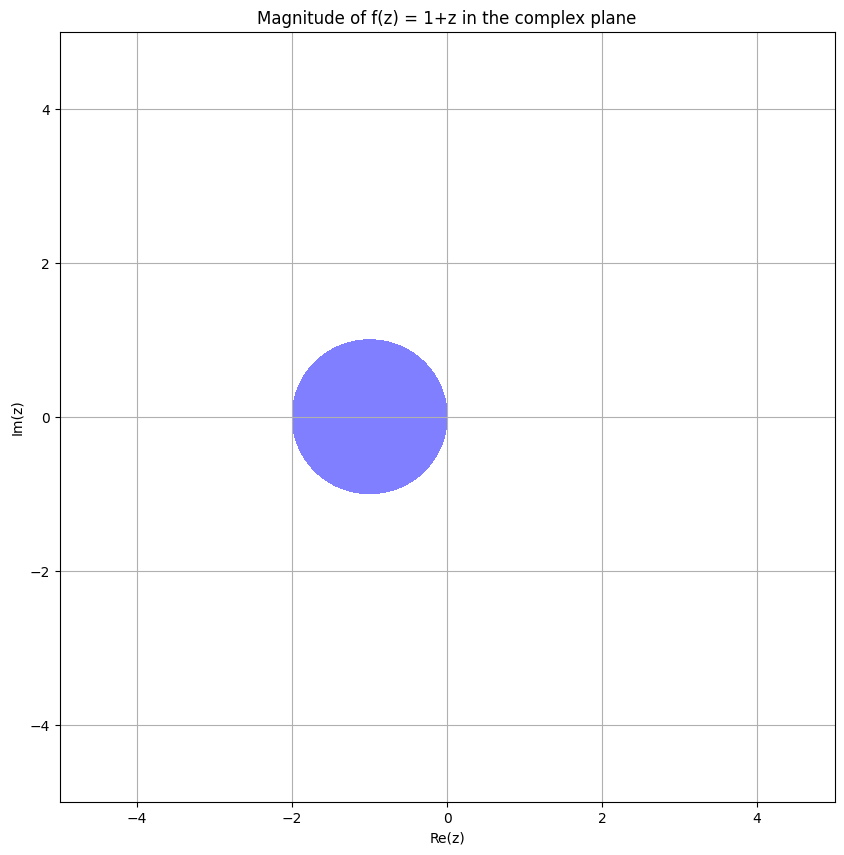

In [ ]:
def complex_function(z):
    return 1 + z

real = np.linspace(-5, 5, 500)
imag = np.linspace(-5, 5, 500)
real, imag = np.meshgrid(real, imag)
z = real + 1j * imag

f_z = complex_function(z)
plt.figure(figsize=(10, 10))
# plt.contour(real, imag, np.abs(f_z), levels=[1], colors='white', linewidths=2, alpha=0.5)

plt.contourf(real, imag, np.abs(f_z), levels=[0,1], colors = ["blue", "white"], alpha=0.5)

plt.title(r'Magnitude of f(z) = 1+z in the complex plane')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.grid(True)
plt.show()

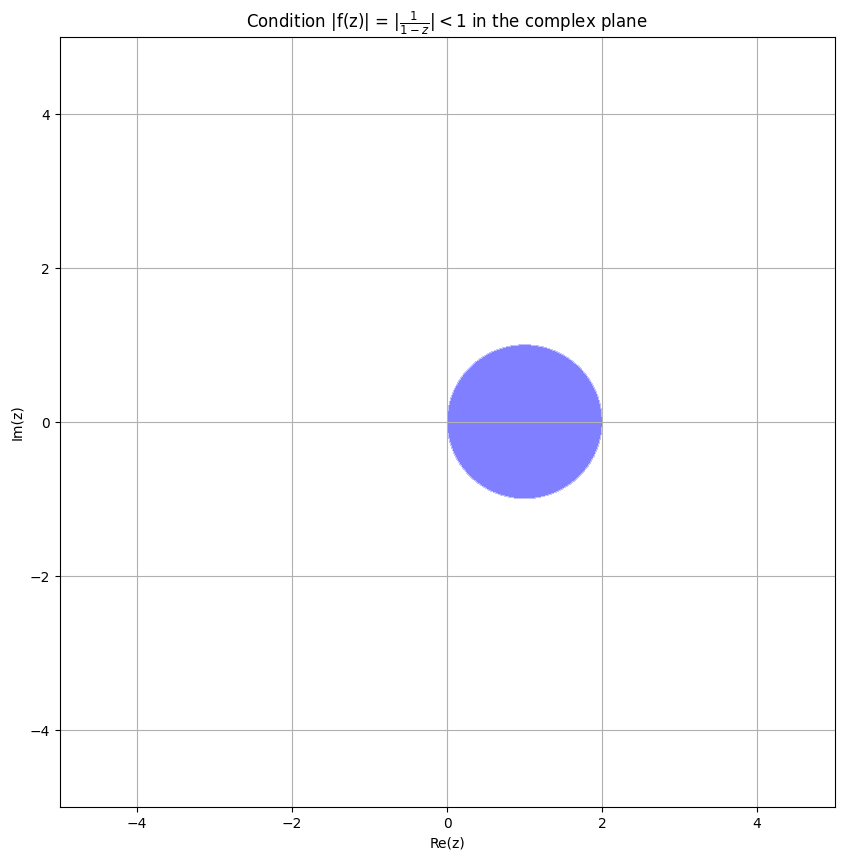

In [48]:
def complex_function(z):
    return 1/(1 - z)

real = np.linspace(-5, 5, 10000)
imag = np.linspace(-5, 5, 10000)
# print(np.sum(np.where(real == 0)))
# print(np.sum(np.where(imag == 0)))

real, imag = np.meshgrid(real, imag)
z = real + 1j * imag

f_z = complex_function(z)

plt.figure(figsize=(10, 10))
# circ = plt.contour(real, imag, np.abs(f_z), levels=[1], colors='black', linewidths=2, alpha=0.5)
# plt.contourf(real, imag, np.angle(f_z), levels=100, cmap='Reds')

plt.contourf(real, imag, np.where(np.abs(f_z) < 1, 1, 0), levels = 1, colors = ["blue","white"], alpha = 0.5)



plt.title(r'Condition |f(z)| = $|\frac{1}{1-z}| < 1$ in the complex plane')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.grid(True)
plt.show()

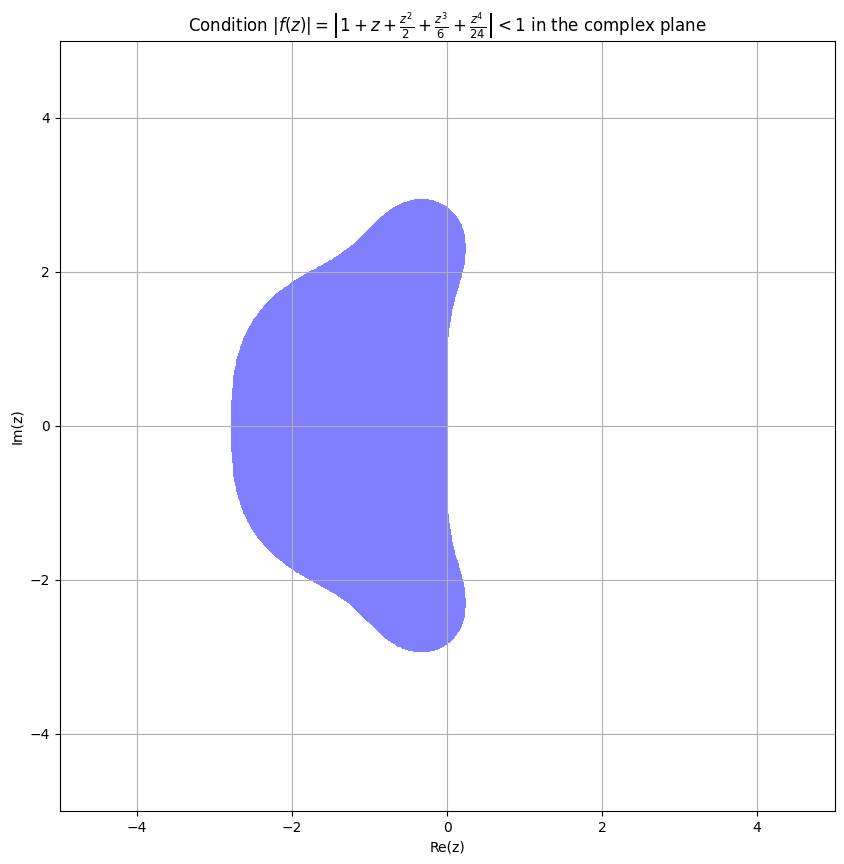

In [49]:
def complex_function(z):
    return 1+z+np.power(z,2)/2+np.power(z,3)/6+np.power(z,4)/24

real = np.linspace(-5, 5, 1000)
imag = np.linspace(-5, 5, 1000)
# print(np.sum(np.where(real == 0)))



# print(np.sum(np.where(imag == 0)))

real, imag = np.meshgrid(real, imag)
z = real + 1j * imag

f_z = complex_function(z)

plt.figure(figsize=(10, 10))
# circ = plt.contour(real, imag, np.abs(f_z), levels=[1], colors='black', linewidths=2, alpha=0.5)
# plt.contourf(real, imag, np.angle(f_z), levels=100, cmap='Reds')

plt.contourf(real, imag, np.where(np.abs(f_z) < 1, 1, 0), levels = 1, colors = ["white","blue"], alpha = 0.5)

plt.title(r'Condition $|f(z)| = \left|1 + z + \frac{z^2}{2} + \frac{z^3}{6} + \frac{z^4}{24}\right| < 1$ in the complex plane')

plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.grid(True)
plt.show()

In [50]:
def f(t, x, lam):
    return lam * (x - np.cos(t)) - np.sin(t)


def exact_solution(t):
    return np.cos(t)


T_0 = 0.0
T = 2.0
X_0 = 1.0


In [51]:
lambda_vals = [-2, -20, -200, -2000, -20000]
N_values = [10, 20, 40, 80, 160, 320, 640, 1280]



all_res = {}

for lam in lambda_vals:
    res_lambda = []  

    for N in N_values:
        h = (T - T_0) / N
        t_nodes = np.linspace(T_0, T, N + 1)

        x_forward = np.zeros(N + 1)
        x_forward[0] = X_0
        for k in range(N):
            x_forward[k + 1] = x_forward[k] + h * f(t_nodes[k], x_forward[k], lam)

        x_backward = np.zeros(N + 1)
        x_backward[0] = X_0
        denominator = 1.0 - h * lam
        for k in range(N):
            numerator = (
                    x_backward[k]
                    - h * lam * np.cos(t_nodes[k + 1])
                    - h * np.sin(t_nodes[k + 1])
                )
            x_backward[k + 1] = numerator / denominator

        exact_vals = exact_solution(t_nodes)

        err_forward = (
            np.max(np.abs(x_forward - exact_vals))
            if np.all(np.isfinite(x_forward))
            else np.inf
        )
        err_backward = (
            np.max(np.abs(x_backward - exact_vals))
            if np.all(np.isfinite(x_backward))
            else np.inf
        )

        if len(res_lambda) == 0:
            res_lambda.append(
                {
                    "N": N,
                    "h": h,
                    "Err-Euler-Otwarty": err_forward,
                    "Err-Euler-Zamkniety": err_backward,
                    "Stosunek Błędu Euler Otwarty": 1,
                    "Stosunek Błędu Euler Zamknięty": 1,
                }
            )
        else:
            res_lambda.append(
                {
                    "N": N,
                    "h": h,
                    "Err-Euler-Otwarty": err_forward,
                    "Err-Euler-Zamkniety": err_backward,
                    "Stosunek Błędu Euler Otwarty": res_lambda[-1]["Err-Euler-Otwarty"]/err_forward,
                    "Stosunek Błędu Euler Zamknięty": res_lambda[-1]["Err-Euler-Zamkniety"]/err_backward,

                }
            )

    df = pd.DataFrame(res_lambda)
    df["h"] = df["h"]
    df["Err-Euler-Otwarty"] = df["Err-Euler-Otwarty"].map(scientific_format)
    df["Err-Euler-Zamkniety"] = df["Err-Euler-Zamkniety"].map(scientific_format)

    print(f"\nTabela dla lambda = {lam}")
    print(tabulate(df, headers="keys", tablefmt="grid", showindex=False))
    all_res[lam] = df




Tabela dla lambda = -2
+------+-----------+---------------------+-----------------------+--------------------------------+----------------------------------+
|    N |         h | Err-Euler-Otwarty   | Err-Euler-Zamkniety   |   Stosunek Błędu Euler Otwarty |   Stosunek Błędu Euler Zamknięty |
+======+===========+=====================+=======================+================================+==================================+
|   10 | 0.2       | 3.76 x 10^-2        | 3.14 x 10^-2          |                        1       |                          1       |
+------+-----------+---------------------+-----------------------+--------------------------------+----------------------------------+
|   20 | 0.1       | 1.79 x 10^-2        | 1.63 x 10^-2          |                        2.10454 |                          1.92159 |
+------+-----------+---------------------+-----------------------+--------------------------------+----------------------------------+
|   40 | 0.05      | 8.73 x 10^